In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [30]:
playlist_df = pd.read_csv("playlist_beat_beat_slow.csv")
playlist_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,popularity
0,5L2ZjCkliMWp0sHDhEksye,Lagu Cinta,Isyana Sarasvati,"['Isyana Sarasvati', 'Afgan', 'Rendy Pandugo']",0.360,0.220,3,-12.222,0,0.0347,0.953,0.00155,0.0895,0.313,153.757,259440,4,2019-05-10,55
1,3FcCAFQj4bLpfxo8gj1kk9,Adu Rayu,Yovie Widianto,"['Yovie Widianto', 'Tulus', 'Glenn Fredly']",0.558,0.374,5,-12.425,1,0.0471,0.598,0.00000,0.1080,0.217,99.953,207700,4,2019-02-22,68
2,504Xxh028W54LAyIMoOmfc,Echo,Isyana Sarasvati,['Isyana Sarasvati'],0.769,0.722,0,-5.773,1,0.0283,0.125,0.00053,0.1500,0.825,103.996,207120,4,2017-09-01,28
3,79esEXlqqmq0GPz0xQSZTV,Lost In Japan,Shawn Mendes,['Shawn Mendes'],0.713,0.738,10,-6.784,1,0.3740,0.255,0.00000,0.1060,0.425,105.027,201200,4,2018-05-25,75
4,6LsAAHotRLMOHfCsSfYCsz,If I Can't Have You,Shawn Mendes,['Shawn Mendes'],0.692,0.809,2,-4.198,1,0.0602,0.524,0.00000,0.1470,0.864,123.911,190800,4,2019-05-03,80


In [31]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 19 columns):
id                  97 non-null object
title               97 non-null object
first_artist        97 non-null object
all_artists         97 non-null object
danceability        97 non-null float64
energy              97 non-null float64
key                 97 non-null int64
loudness            97 non-null float64
mode                97 non-null int64
speechiness         97 non-null float64
acousticness        97 non-null float64
instrumentalness    97 non-null float64
liveness            97 non-null float64
valence             97 non-null float64
tempo               97 non-null float64
duration_ms         97 non-null int64
time_signature      97 non-null int64
release_date        97 non-null object
popularity          97 non-null int64
dtypes: float64(9), int64(5), object(5)
memory usage: 14.5+ KB


In [32]:
playlist_df["release_date"][0].split("-")[0]

'2019'

In [33]:
playlist_df[["year", "month", "date"]] = playlist_df.release_date.str.split("-", expand=True)
playlist_df["year"] = pd.to_numeric(playlist_df["year"])
playlist_df["month"] = pd.to_numeric(playlist_df["month"])
playlist_df["date"] = pd.to_numeric(playlist_df["date"])
print(playlist_df.head(5))

                       id                title      first_artist  \
0  5L2ZjCkliMWp0sHDhEksye           Lagu Cinta  Isyana Sarasvati   
1  3FcCAFQj4bLpfxo8gj1kk9             Adu Rayu    Yovie Widianto   
2  504Xxh028W54LAyIMoOmfc                 Echo  Isyana Sarasvati   
3  79esEXlqqmq0GPz0xQSZTV        Lost In Japan      Shawn Mendes   
4  6LsAAHotRLMOHfCsSfYCsz  If I Can't Have You      Shawn Mendes   

                                      all_artists  danceability  energy  key  \
0  ['Isyana Sarasvati', 'Afgan', 'Rendy Pandugo']         0.360   0.220    3   
1     ['Yovie Widianto', 'Tulus', 'Glenn Fredly']         0.558   0.374    5   
2                            ['Isyana Sarasvati']         0.769   0.722    0   
3                                ['Shawn Mendes']         0.713   0.738   10   
4                                ['Shawn Mendes']         0.692   0.809    2   

   loudness  mode  speechiness  ...  liveness  valence    tempo  duration_ms  \
0   -12.222     0       0.0347

In [43]:
playlist_df["year"].unique()

array([2019, 2017, 2018, 2016, 2003, 2013, 2020, 2012, 2014, 2007, 2011,
       2002], dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

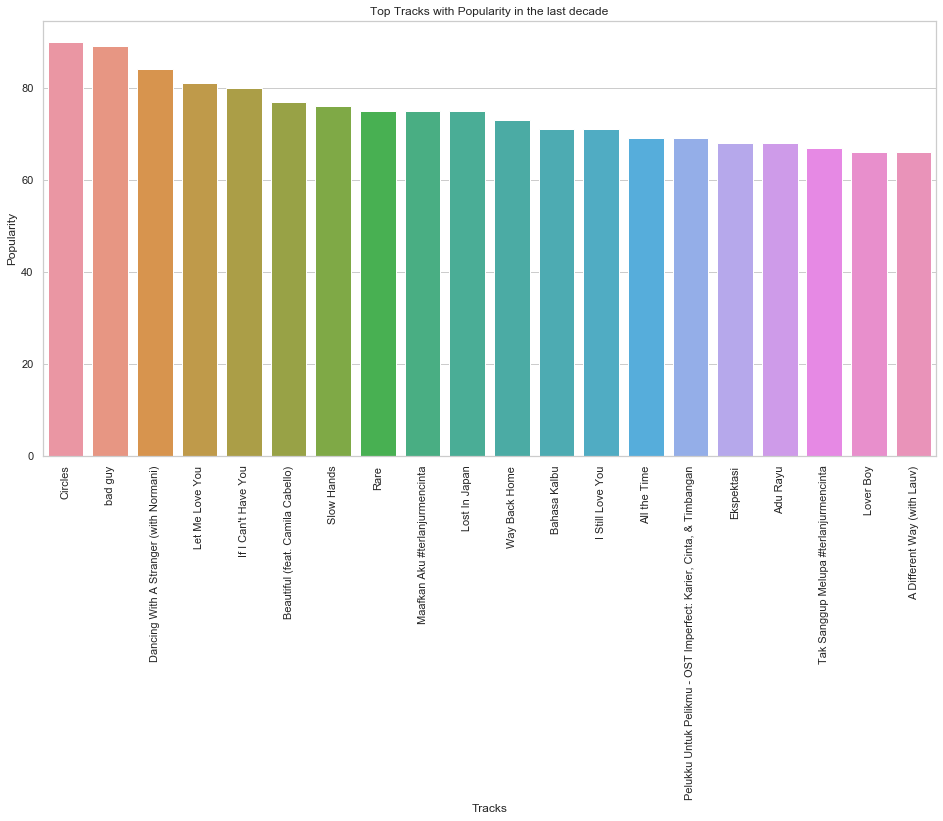

In [34]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
x = playlist_df[(playlist_df["year"]>=2010) & (playlist_df["year"]<=2020)].groupby("title")["popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top Tracks with Popularity in the last decade")
ax.set_ylabel("Popularity")
ax.set_xlabel("Tracks")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

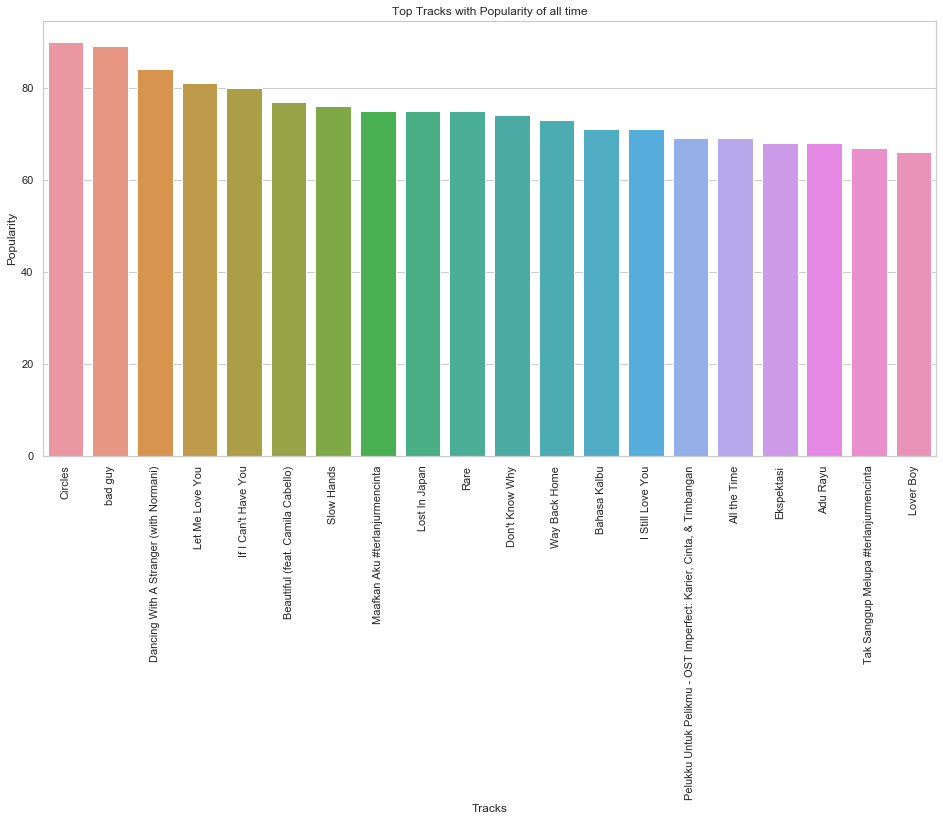

In [35]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
x = playlist_df.groupby("title")["popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top Tracks with Popularity of all time")
ax.set_ylabel("Popularity")
ax.set_xlabel("Tracks")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

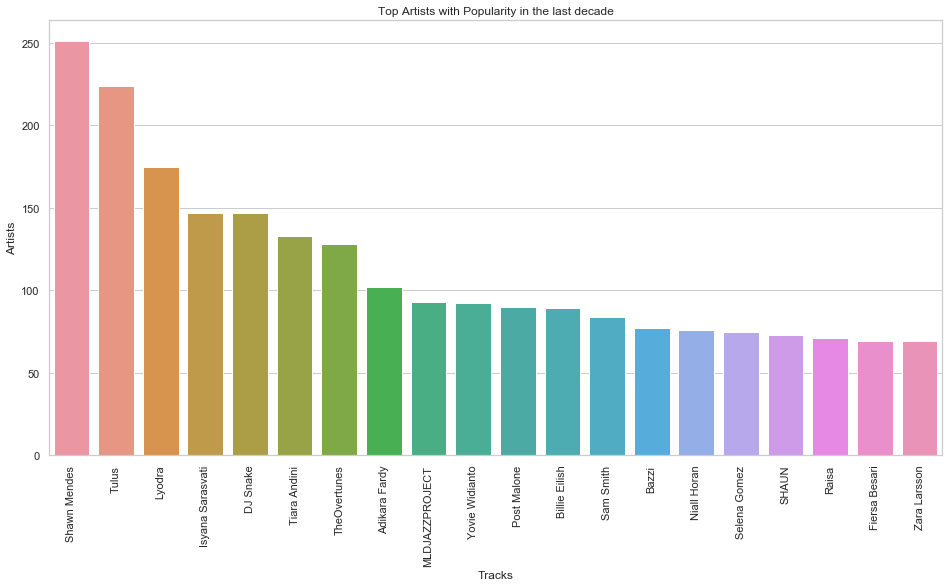

In [36]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
x = playlist_df[(playlist_df["year"]>=2010) & (playlist_df["year"]<=2020)].groupby("first_artist")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top Artists with Popularity in the last decade")
ax.set_ylabel("Artists")
ax.set_xlabel("Tracks")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

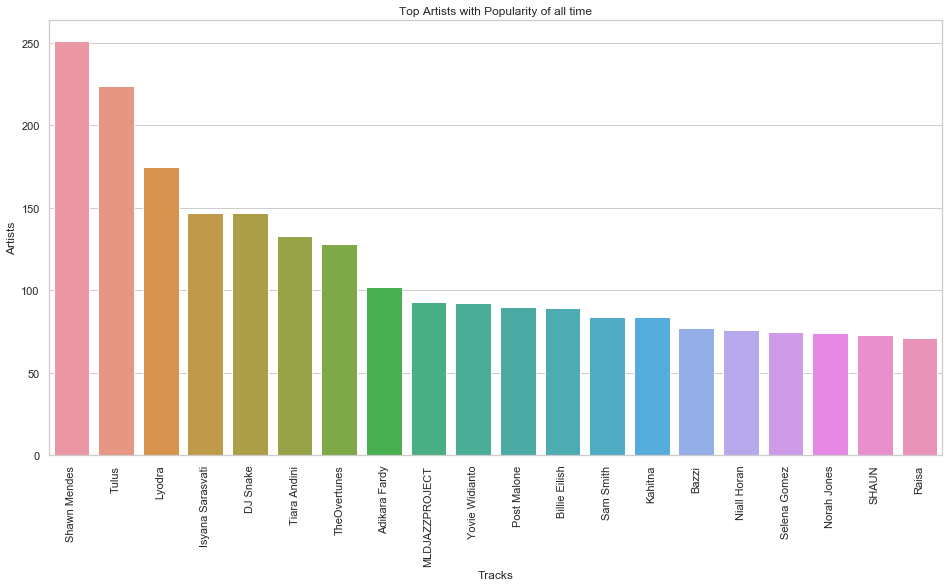

In [37]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
x = playlist_df.groupby("first_artist")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top Artists with Popularity of all time")
ax.set_ylabel("Artists")
ax.set_xlabel("Tracks")
plt.xticks(rotation=90)

Text(0, 0.5, 'Count')

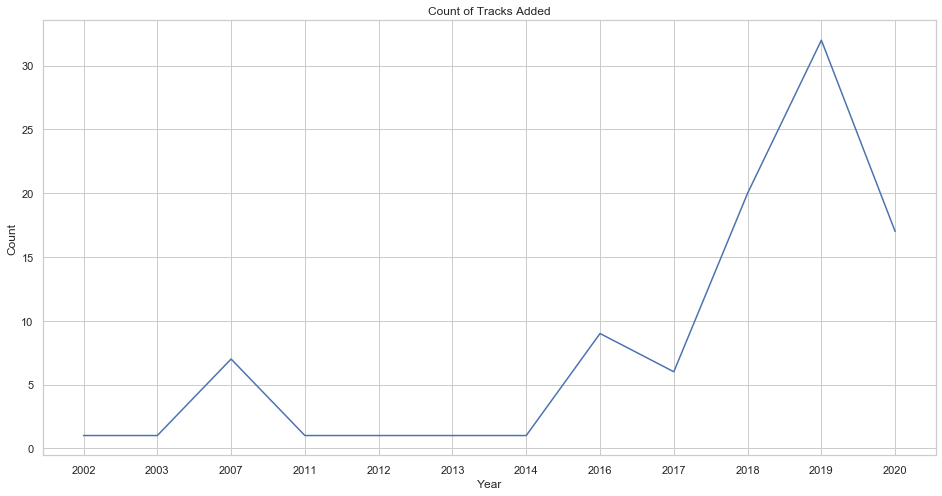

In [54]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
x = playlist_df.groupby("year")["id"].count()
ax = sns.lineplot(x.index.astype(str), x)
# ax.locator_params(integer=True)
ax.set_title("Count of Tracks Added")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

Text(0, 0.5, 'Measure')

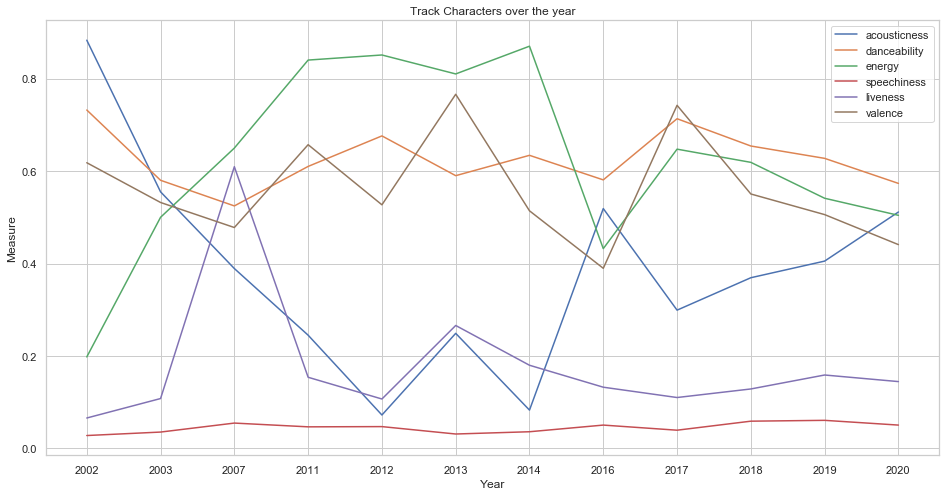

In [53]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in cols:
    x = playlist_df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index.astype(str), y=x, label=col)
# ax.locator_params(integer=True)
ax.set_title("Track Characters over the year")
ax.set_xlabel("Year")
ax.set_ylabel("Measure")

Text(0, 0.5, 'Measure')

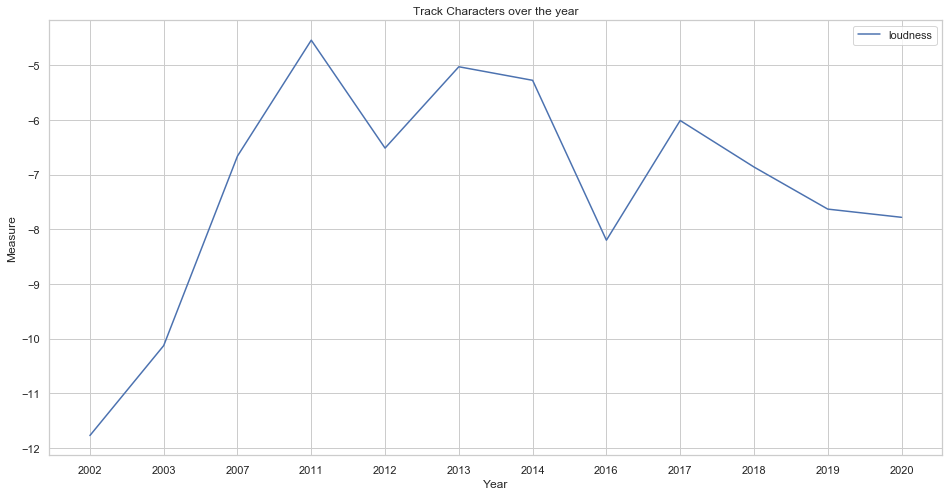

In [51]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
cols = ["loudness"]
for col in cols:
    x = playlist_df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index.astype(str), y=x, label=col)
# ax.locator_params(integer=True)
ax.set_title("Track Characters over the year")
ax.set_xlabel("Year")
ax.set_ylabel("Measure")

Text(0, 0.5, 'Measure')

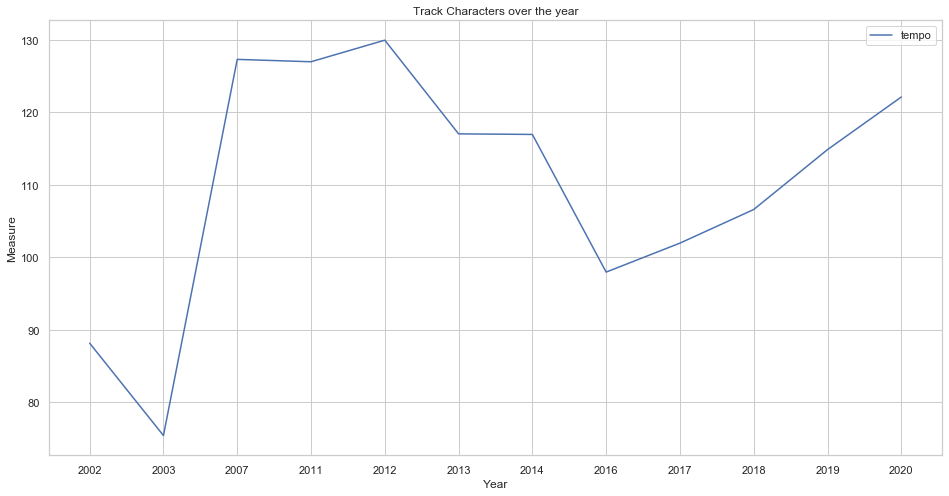

In [50]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
cols = ["tempo"]
for col in cols:
    x = playlist_df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index.astype(str), y=x, label=col)
# ax.locator_params(integer=True)
ax.set_title("Track Characters over the year")
ax.set_xlabel("Year")
ax.set_ylabel("Measure")